In [4]:
from gensim.models import Word2Vec
from gensim.models import FastText
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book'],
         
          ['this', 'is', 'about', 'machine', 'learning', 'post'],
          ['orange', 'juice', 'is', 'the', 'liquid', 'extract', 'of', 'fruit'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'varieties'],
          ['this', 'is', 'the', 'last', 'machine', 'learning', 'book'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'packages'],
          ['orange', 'juice', 'is', 'liquid', 'extract', 'from', 'fruit', 'on', 'orange', 'tree']]

sentences_ft = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book']]

In [5]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
model_ft = FastText(sentences, size=10, window=5, min_count=1,workers=4,sg=1)

In [6]:
print('W2V: ' ,model['is'])
print('FT:  ',model_ft['is'])

W2V:  [-0.02090233  0.01446655  0.02360061 -0.012161   -0.00891778  0.02094486
  0.00333307  0.01290495 -0.01337651  0.01897183 -0.01448441 -0.01724555
 -0.00380823  0.0246321   0.00166143  0.01650485  0.00545061  0.021212
  0.02347869  0.0244432 ]
FT:   [-0.00552799  0.03367986 -0.05883833 -0.00220477 -0.00529791 -0.02039591
  0.03492972 -0.02631471 -0.01446425  0.0007874 ]


C:\Users\Krishna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Krishna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
print('W2V: ',model.wv.similarity('orange','juice'))
print('FT: ',model_ft.wv.similarity('orange','juice'))

W2V:  -0.10671631
FT:  0.37623638


In [8]:
print('W2V: ',model.wv.similarity('this','orange'))

print('FT: ',model_ft.wv.similarity('this','orange'))

W2V:  -0.08410692
FT:  -0.19383095


In [9]:
print("W2V: ", model.wv.most_similar('orange')[:5])
print("FT: ", model_ft.wv.most_similar('orange')[:5])

W2V:  [('new', 0.5577613115310669), ('fruit', 0.2563130557537079), ('in', 0.2530960142612457), ('more', 0.2044486552476883), ('comes', 0.20011071860790253)]
FT:  [('extract', 0.617983877658844), ('about', 0.4799743890762329), ('juice', 0.37623634934425354), ('comes', 0.26764047145843506), ('one', 0.24458611011505127)]


In [10]:
model.wv['maachine']
#Will generate error; Out of vocabulary word: OOV

KeyError: "word 'maachine' not in vocabulary"

In [11]:
model_ft.wv['maachine']
#FastText showing output, unlike word2vec

array([-0.01146221, -0.00701775, -0.01048237,  0.00852862, -0.00037361,
        0.00613205,  0.00666531,  0.00159444,  0.00018649, -0.01788029],
      dtype=float32)

In [12]:
close_words = model.wv.similar_by_word('orange')
close_words

[('new', 0.5577613115310669),
 ('fruit', 0.2563130557537079),
 ('in', 0.2530960142612457),
 ('more', 0.2044486552476883),
 ('comes', 0.20011071860790253),
 ('several', 0.15689168870449066),
 ('another', 0.15440544486045837),
 ('machine', 0.14508786797523499),
 ('on', 0.1091504767537117),
 ('extract', 0.10813979804515839)]

In [13]:
close_words_ft = model_ft.wv.similar_by_word('orange')
close_words_ft

[('extract', 0.617983877658844),
 ('about', 0.4799743890762329),
 ('juice', 0.37623634934425354),
 ('comes', 0.26764047145843506),
 ('one', 0.24458611011505127),
 ('machine', 0.23994584381580353),
 ('good', 0.2246473729610443),
 ('post', 0.20221419632434845),
 ('from', 0.19821178913116455),
 ('new', 0.17364370822906494)]

In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model.wv[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()

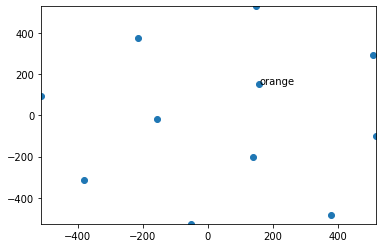

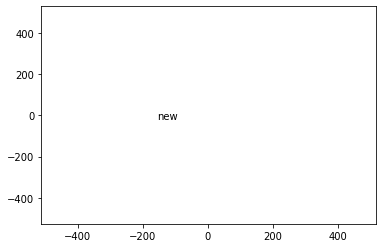

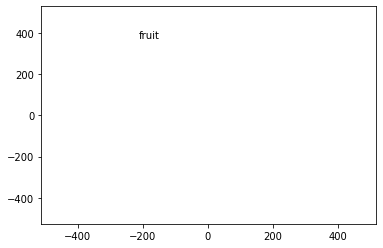

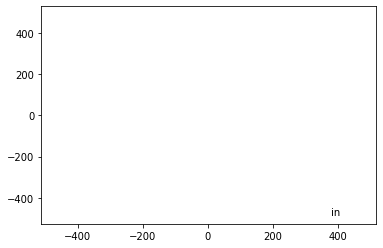

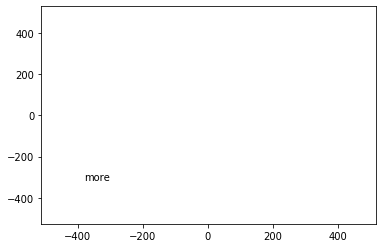

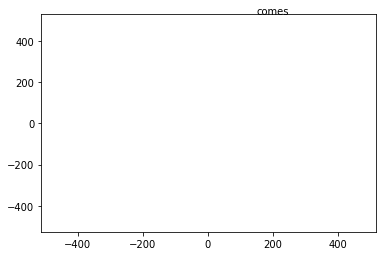

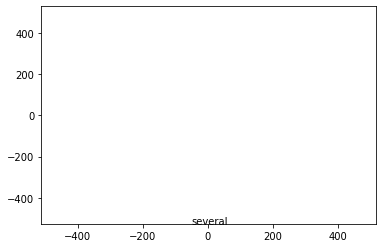

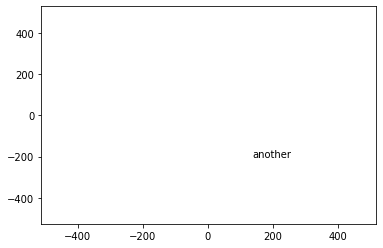

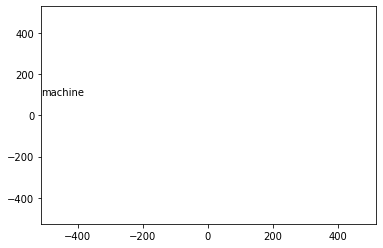

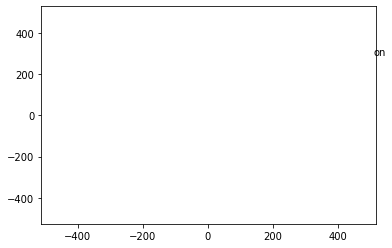

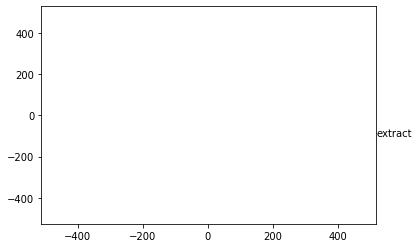

In [15]:
#for Word2Vec
display_closestwords_tsnescatterplot(model, 'orange', 20)

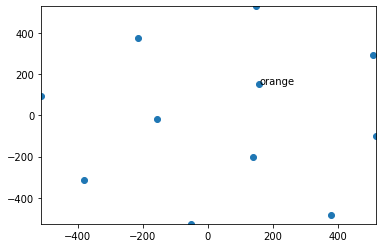

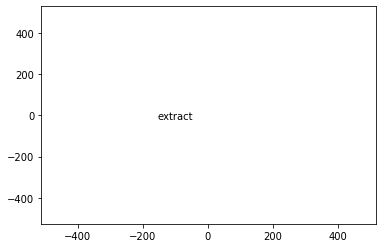

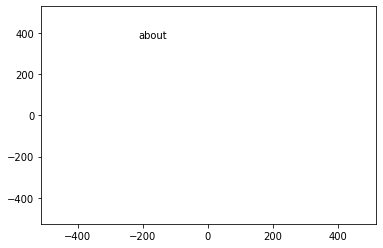

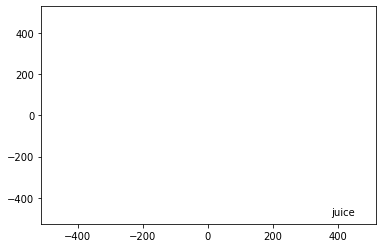

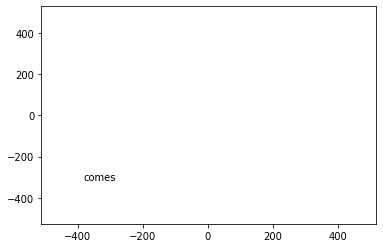

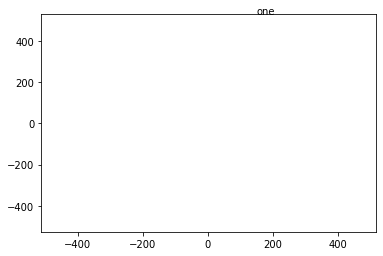

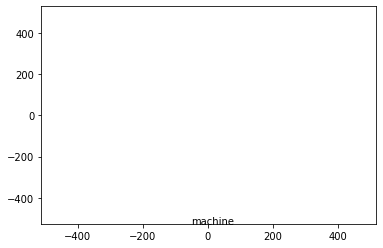

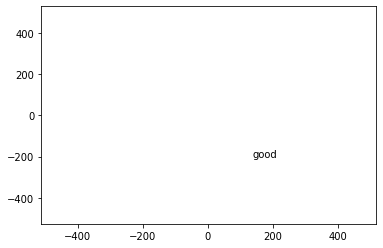

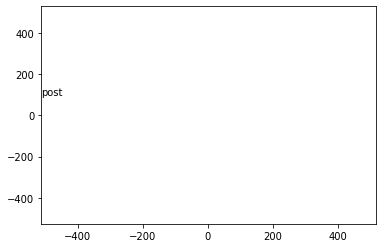

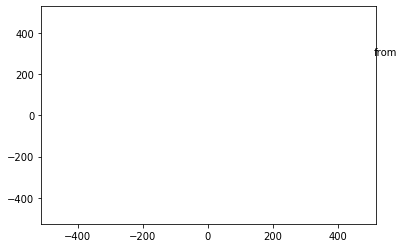

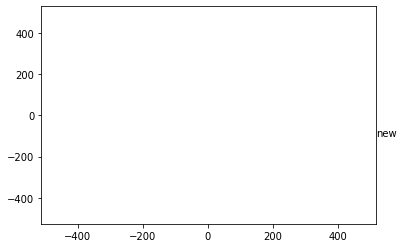

In [16]:
#for FastText
display_closestwords_tsnescatterplot(model_ft, 'orange', 10)

In [23]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))
    

In [27]:
def sent_vectorizer_ft(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))

Ft = []
for sentence in sentences:
    Ft.append(sent_vectorizer_ft(sentence, model_ft))

C:\Users\Krishna\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [28]:
Ft[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [29]:
V[0]

array([-0.48100845,  0.38828202,  0.18954034,  0.01079636, -0.29415156,
        0.1154099 , -0.04911743, -0.22870889, -0.00203184,  0.33799256,
       -0.0959599 ,  0.17143642,  0.07456579,  0.20173814,  0.3384886 ,
        0.24781098, -0.08778113,  0.10893602,  0.17987633,  0.01574518])

In [30]:
V

[array([-0.48100845,  0.38828202,  0.18954034,  0.01079636, -0.29415156,
         0.1154099 , -0.04911743, -0.22870889, -0.00203184,  0.33799256,
        -0.0959599 ,  0.17143642,  0.07456579,  0.20173814,  0.3384886 ,
         0.24781098, -0.08778113,  0.10893602,  0.17987633,  0.01574518]),
 array([-0.20464488,  0.21579032,  0.02121534, -0.07213231, -0.24261948,
         0.25239617,  0.19051227, -0.05659494, -0.11684081,  0.27672268,
        -0.40651793,  0.13811712,  0.08256956,  0.36169711,  0.31641217,
         0.18479427, -0.30817679,  0.3174965 ,  0.0398708 ,  0.000873  ]),
 array([ 0.03688409,  0.11882863, -0.46428465,  0.00614425, -0.24222622,
         0.1155027 ,  0.04496647, -0.15668801,  0.38886465, -0.08720663,
        -0.06220386,  0.05268567, -0.34356863, -0.08976921, -0.09304864,
        -0.10468135,  0.25617671, -0.31859781, -0.19327859,  0.39327618]),
 array([-0.04070758,  0.08603376,  0.30765775, -0.18205764, -0.24720179,
        -0.04477156,  0.11860029, -0.29405388

In [31]:
Ft

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan